In [2]:
from djccx.frd.readfrd import readfrd
import os,glob

In [3]:
from matplotlib import pyplot as plt

In [4]:
frds_files = glob.glob("*/*/*.frd")

In [5]:
frds_files.sort()

In [6]:

def localread(x):

    try:
        return readfrd(x)
    except:
        return 0
ifrds = [ localread(ifr) for ifr in frds_files ]

In [7]:
import numpy as np

F3 3536.573004004682
F3 2532.4442315705955
F3 2340.186797519485
F3 2381.136799954356
F3 3473.2255883077705
F3 3676.211039961555


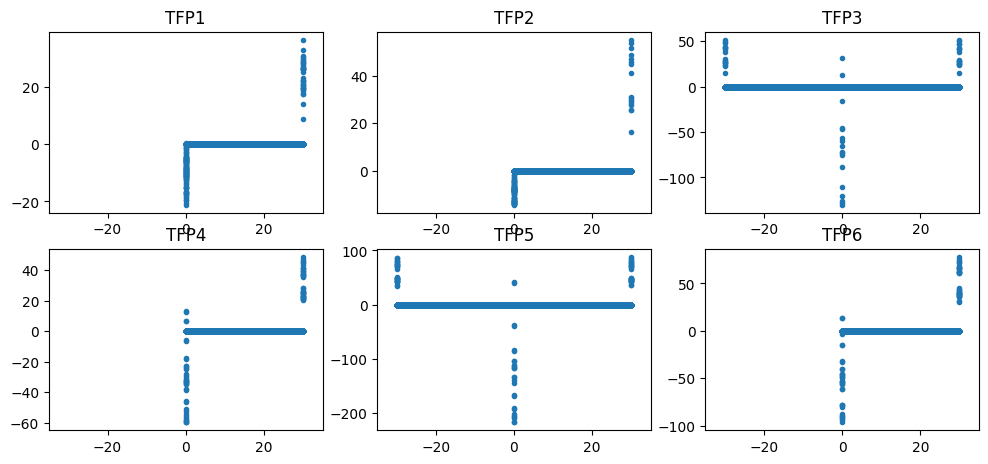

In [8]:
fig = plt.figure(figsize=(12,8))
F3_span = []
factor = [ 4,4,2,2,1,2]
tt = []
for j,ifr in enumerate(ifrds):
    plt.subplot(3,3,j+1)
    data = ifr["data"]
    plt.plot(data["x"], data["F3"],".")
    plt.xlim(-35,35)
    plt.title("TFP" + str(j+1))

    # select x>-10 and x<10
    F3 = data["F3"][data["x"]>-10]
    F3 = F3[data["x"]<10]
    F3 = - np.sum(F3)*factor[j]
    print("F3",F3)
    F3_span.append(F3)

    ti = np.max(data["z"]) - np.min(data["z"])
    tt.append(ti)

In [9]:
F3_span = np.array(F3_span)
tt = np.array(tt)

In [10]:
P = F3_span
B = 25
L = 60
U = 5
Eflex = (P*L**3)/(4*U*B*tt**3) * 1e-3

In [11]:
import pandas as pd

In [12]:
df_pred_file = r"C:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts_finals\01_metodo\02_flexion\04_optim_stress\df_pred.csv"
df_pred_file = "../../../scripts_finals/01_metodo/02_flexion/04_optim_stress/df_pred.csv"
df_pred = pd.read_csv(df_pred_file)

In [13]:
Eb_pred = df_pred["Eb [GPa]"]

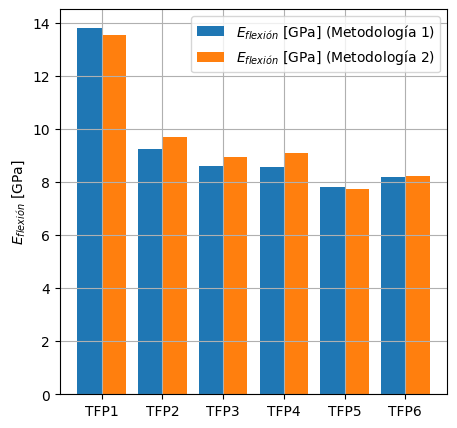

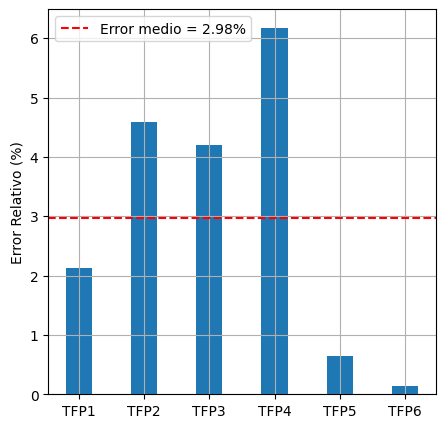

In [14]:
# bar plot 
# TFP1, TFP2, TFP3, TFP4, TFP5, TFP6
fig = plt.figure(figsize=(5,5))
xp = np.arange(len(Eb_pred))
plt.bar(xp, Eb_pred, width=0.4, label=r"$E_{flexión}$ [GPa] (Metodología 1)")
plt.bar(xp+0.4, Eflex, width=0.4, label="$E_{flexión}$ [GPa] (Metodología 2)")
plt.ylabel("$E_{flexión}$ [GPa]")
plt.xticks(xp+0.2, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])
plt.legend()
plt.grid()

fig = plt.figure(figsize=(5,5))
error_abs = np.abs(Eb_pred - Eflex)
error_rel = np.abs((Eb_pred - Eflex)/Eb_pred)*100
error_mu = np.mean(error_rel)
plt.bar(xp, error_rel, width=0.4)
# line 
plt.axhline(y=error_mu, color='r', linestyle='--', label="Error medio = %.2f" % error_mu + "%")
plt.ylabel("Error Relativo (%)")
plt.xticks(xp, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])
plt.legend()
plt.grid()



Text(0, 0.5, '$E_{flexión}$ [GPa] (Metodología 2)')

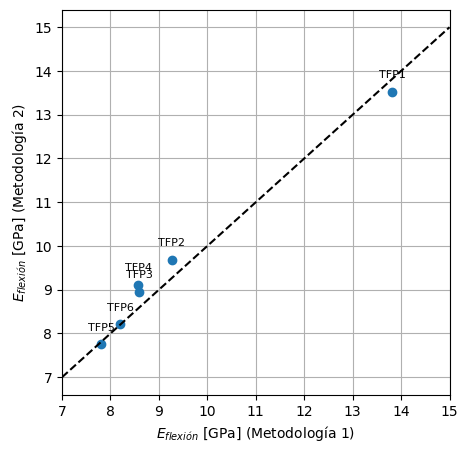

In [15]:

# vs 
fig = plt.figure(figsize=(5,5))
plt.plot(Eb_pred, Eflex, "o")
plt.plot([7, 15], [7, 15], "k--")
plt.xlim(7, 15)

for i in range(len(Eb_pred)):
    plt.annotate("TFP" + str(i+1), (Eb_pred[i], Eflex[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
plt.grid()

plt.xlabel("$E_{flexión}$ [GPa] (Metodología 1)")
plt.ylabel("$E_{flexión}$ [GPa] (Metodología 2)")


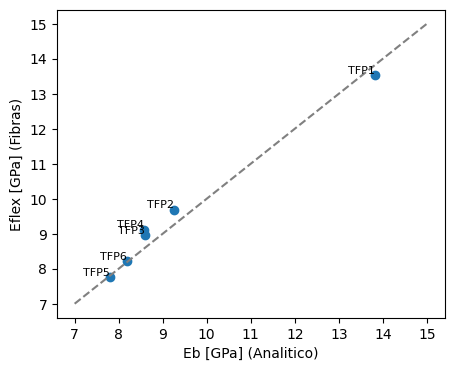

In [16]:
#plot vs 
plt.figure(figsize=(5,4))
plt.plot(Eb_pred, Eflex, "o")
plt.xlabel("Eb [GPa] (Analitico)")
plt.ylabel("Eflex [GPa] (Fibras)")
#1:1 line
x = np.linspace(7, 15, 100)
plt.plot(x, x, "--", color="gray")

# text 
for i, txt in enumerate(["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"]):
    plt.annotate(txt, (Eb_pred[i], Eflex[i]), fontsize=8, ha='right', va='bottom')

In [17]:
from validation.FullExperimental import FullExperimental
df = FullExperimental()
Eb_expiremental = df["Eb [GPa]"]["mean"].values
Eb_expiremental

array([13.20105043,  9.86950067,  9.22200343, 10.18181529,  6.14310539,
        7.79805989])

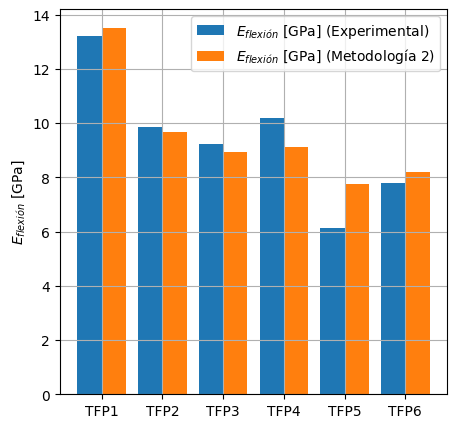

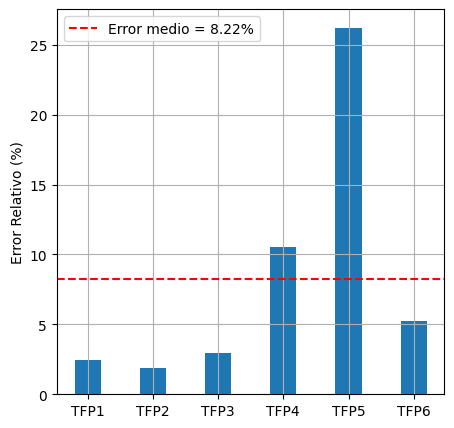

In [18]:
# bar plot 
# TFP1, TFP2, TFP3, TFP4, TFP5, TFP6
fig = plt.figure(figsize=(5,5))
xp = np.arange(len(Eb_expiremental))
plt.bar(xp, Eb_expiremental, width=0.4, label=r"$E_{flexión}$ [GPa] (Experimental)")
plt.bar(xp+0.4, Eflex, width=0.4, label="$E_{flexión}$ [GPa] (Metodología 2)")
plt.ylabel("$E_{flexión}$ [GPa]")
plt.xticks(xp+0.2, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])
plt.legend()
plt.grid()

fig = plt.figure(figsize=(5,5))
error_abs = np.abs(Eb_expiremental - Eflex)
error_rel = np.abs((Eb_expiremental - Eflex)/Eb_expiremental)*100
error_mu = np.mean(error_rel)
plt.bar(xp, error_rel, width=0.4)
# line 
plt.axhline(y=error_mu, color='r', linestyle='--', label="Error medio = %.2f" % error_mu + "%")
plt.ylabel("Error Relativo (%)")
plt.xticks(xp, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])
plt.legend()
plt.grid()



In [19]:
df_results = pd.DataFrame({
        "Eflex [GPa] (Fibras)": Eflex,

        "Eflex [GPa] (Experimental)": Eb_expiremental,
    "Error Absoluto (GPa)": error_abs,
    "Error Relativo (%)": error_rel
})
df_results.round(3)

,Eflex [GPa] (Fibras),Eflex [GPa] (Experimental),Error Absoluto (GPa),Error Relativo (%)
0,13.525,13.201,0.324,2.456
1,9.685,9.870,0.184,1.868
2,8.950,9.222,0.272,2.951
3,9.106,10.182,1.075,10.562
4,7.754,6.143,1.611,26.225
5,8.207,7.798,0.409,5.248


In [50]:
P1_json_files = glob.glob("*/*.json")

In [51]:
from loadsavejson.loadjson import loadjson

In [52]:
P1_json_files.sort()
P1_json_files

['TPF1/P1.json',
 'TPF2/P1.json',
 'TPF3/P1.json',
 'TPF4/P1.json',
 'TPF5/P1.json',
 'TPF6/P1.json']

In [82]:
P1_json = [ loadjson(x) for x in P1_json_files ]

In [83]:
positions = [ x["position"] for x in P1_json ]

In [84]:
positions = np.array(positions)
positions

array([[ 0.694444  ,  0.95056   , -2.35763   ],
       [ 1.73611   ,  4.16667   , -1.88262   ],
       [-1.23274   ,  4.37334   , -1.88262   ],
       [ 0.291787  , -1.96084   , -2.2287    ],
       [-0.00939366, -2.02722   , -2.6545    ],
       [ 0.267831  , -1.85852   , -2.6545    ]])

Text(0.5, 1.0, 'Posiciones de las maximos  de la resina')

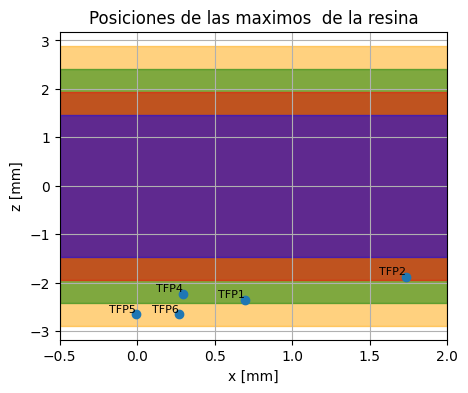

In [85]:
# plot x,z 
tn  = 2.934
tl = 0.475

fig = plt.figure(figsize=(5,4))
plt.plot(positions[:,0], positions[:,2], "o")
#draw tn/2 line and -tn/2 line
# plt.axhline(tn/2, color="black", linestyle="--")
# plt.axhline(-tn/2, color="black", linestyle="--")
# plt.axhline(tn/2+tl, color="blue", linestyle="--")
# plt.axhline(-tn/2-tl, color="blue", linestyle="--")

# plt.axhline(tn/2+2*tl, color="red", linestyle="--")
# plt.axhline(-tn/2-2*tl, color="red", linestyle="--")

# plt.axhline(tn/2+3*tl, color="g", linestyle="--")
# plt.axhline(-tn/2-3*tl, color="g", linestyle="--")

# rectangle 
plt.fill_betweenx([-tn/2-3*tl, tn/2+3*tl], -0.5, 2, color="orange", alpha=0.5)
plt.fill_betweenx([-tn/2-2*tl, tn/2+2*tl], -0.5, 2, color="g", alpha=0.5)
plt.fill_betweenx([-tn/2-tl, tn/2+tl], -0.5, 2, color="r", alpha=0.5)
plt.fill_betweenx([-tn/2, tn/2], -0.5, 2, color="blue", alpha=0.5)

plt.grid()
plt.xlabel("x [mm]")
plt.ylabel("z [mm]")
for i, txt in enumerate(["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"]):
    plt.annotate(txt, (positions[i,0], positions[i,2]), fontsize=8, ha='right', va='bottom')

plt.xlim(-0.5,2)
plt.title("Posiciones de las maximos  de la resina")

In [86]:
from validation.FullExperimental import FullExperimental


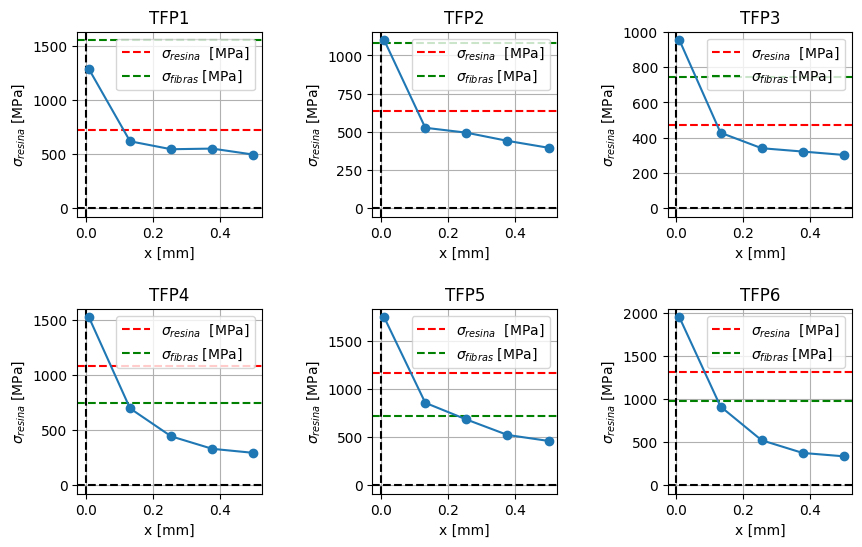

In [97]:
fig = plt.figure(figsize=(10,6))
# subplot padding
plt.subplots_adjust(wspace=0.6, hspace=0.5)
for kk,iP1_json in enumerate(P1_json):
    plt.subplot(2,3,kk+1)
    P1_max_fibre = iP1_json["P1_max"]
    P1_max_resina_i = iP1_json["P1_max_resina"]
    # horizontal line at P1_max_resina_i
    plt.axhline(P1_max_resina_i, color="red", linestyle="--",label=r"$\sigma_{resina}$  [MPa]")
    plt.axhline(P1_max_fibre, color="green", linestyle="--", label=r"$\sigma_{fibras}$ [MPa]")
    plt.axhline(0, color="black", linestyle="--")
    plt.axvline(0, color="black", linestyle="--")
    plt.plot(iP1_json["rr_list"], iP1_json["P1_max_resina_list"], "o-")
    plt.title("TFP" + str(kk+1))
    plt.xlabel("x [mm]")
    plt.ylabel(r"$\sigma_{resina}$ [MPa]")
    plt.grid()
    plt.legend()

In [ ]:
df_pred_an_file = r"C:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts_finals\01_metodo\02_flexion\04_optim_stress\df_pred.csv"
df_pred_an_file = "../../01_metodo/02_flexion/04_optim_stress/df_pred.csv"
df_pred_an = pd.read_csv(df_pred_an_file)
Sb = df_pred_an["Sb [MPa]"]


In [268]:
df_pred_an_file_trac = "../../../scripts_finals/01_metodo/01_traccion/04_optim_stress/df_pred.csv"
df_pred_an_trac = pd.read_csv(df_pred_an_file_trac)
St = df_pred_an_trac["St [MPa]"]

Optimization terminated successfully.
         Current function value: 3643.873529
         Iterations: 164
         Function evaluations: 328
P1_fibra_opt 320.79044364209574
P1_resina_opt 519.6311716631651
Optimization terminated successfully.
         Current function value: 1292.319709
         Iterations: 168
         Function evaluations: 331
P1_fibra_opt 310.5701089023743
P1_resina_opt 261.4384754484473
Optimization terminated successfully.
         Current function value: 1356.278309
         Iterations: 162
         Function evaluations: 326
P1_fibra_opt 299.61167484494626
P1_resina_opt 196.2735187339709
Optimization terminated successfully.
         Current function value: 1356.278309
         Iterations: 168
         Function evaluations: 332
P1_fibra_opt 299.6116749349651
P1_resina_opt 150.1724154006927
P1_fibra_opt 389.35182006522643
P1_resina_opt 113.2664020998968


/tmp/ipykernel_942895/3927976895.py:60: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  res = minimize(lambda x: find_optimal_P1(x[0], x[1]),


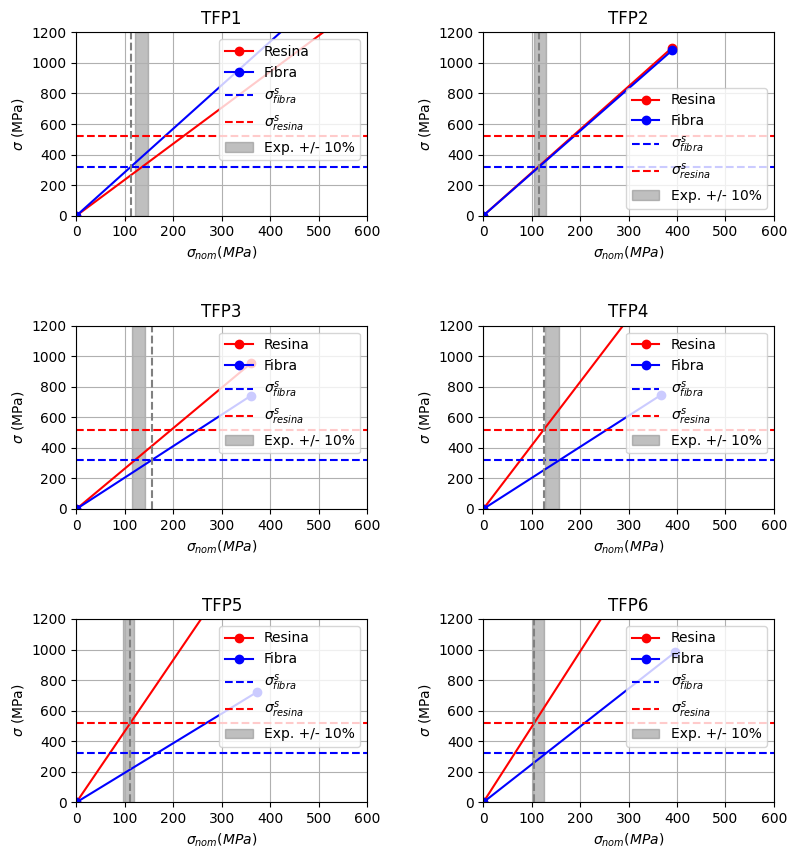

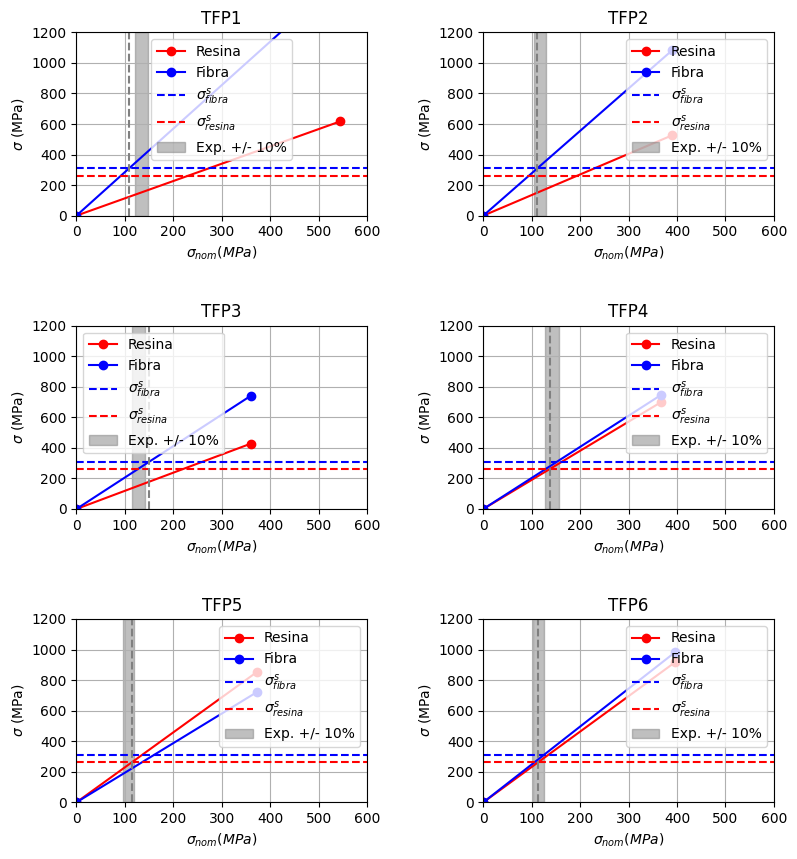

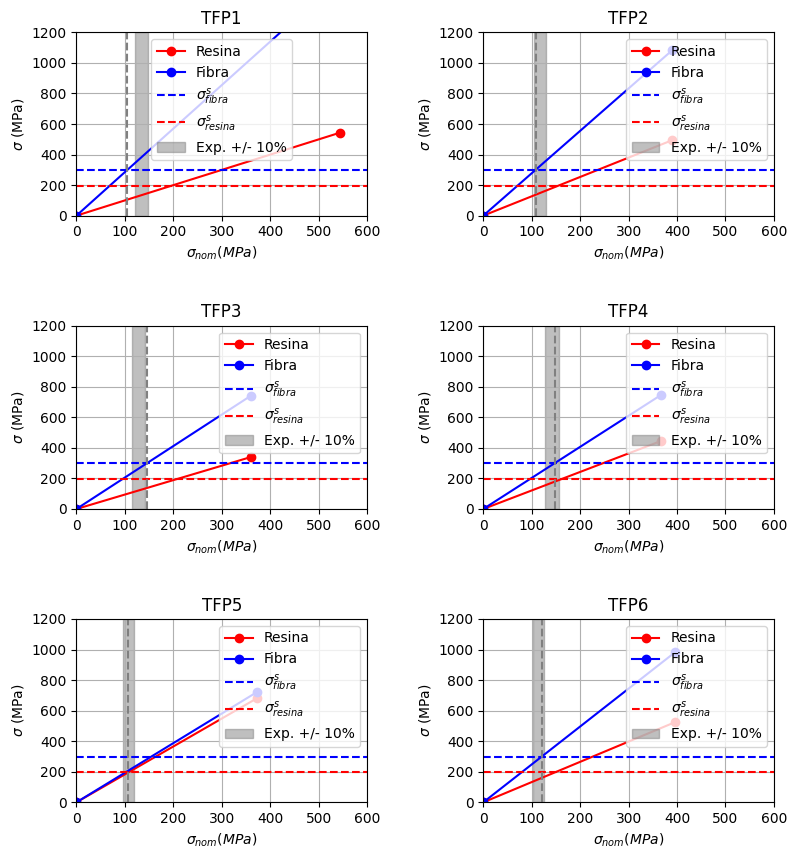

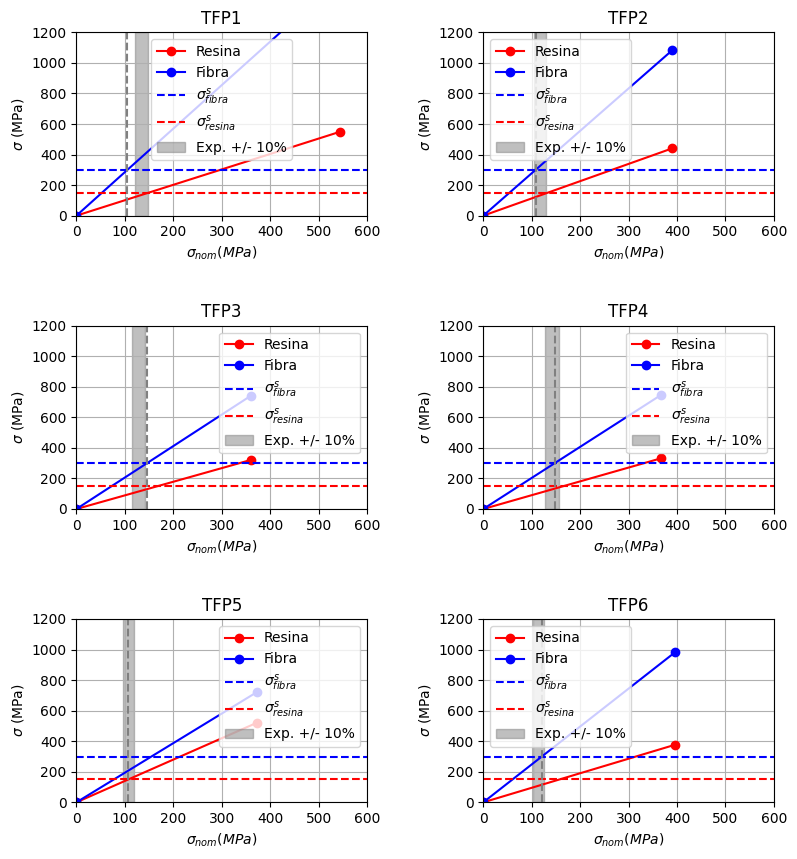

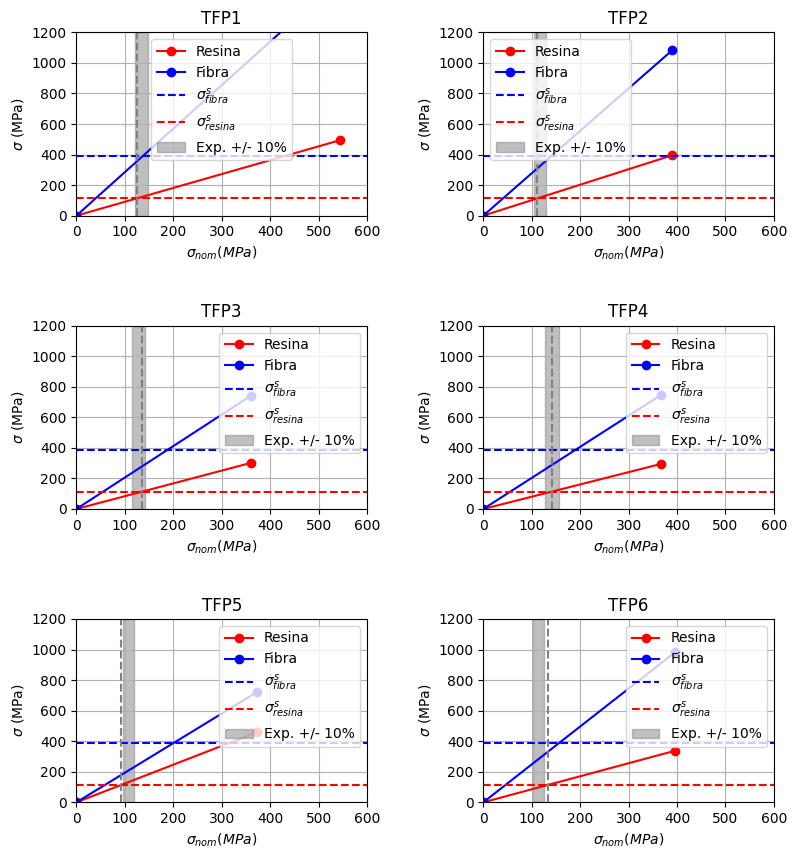

In [278]:
S_fibre_opts = []
S_matrix_opts = []
error_mu_opts = []
S_TPFi_opts = []
error_mu_metodos = []
error_traccion = []

P1_opts_resina_list = []
P1_opts_fibra_list = []
for jjj in range(len(iP1_json["rr_list"])):

    Sfibre = 1243.05186
    # Sfibre = 300

    Smatrix = 620.94557
    # Smatrix = 200

    P1_max = [ x["P1_max"] for x in P1_json ]
    P1_max = np.array(P1_max)

    # P1_resina = [ x["P1_max_resina"] for x in P1_json ]
    P1_resina = [ x["P1_max_resina_list"][jjj] for x in P1_json ]
    sigma_exp = (3/2)*F3_span*L/(B*tt**2)
        
    K_fibra = P1_max/sigma_exp
    K_resina = P1_resina/sigma_exp

    S_TPFi = [ np.min([Sfibre/K_fibra[i], Smatrix/K_resina[i]]) 
            for i in range(len(K_fibra)) ]
    S_TPFi = np.array(S_TPFi)
    S_TPFi_old = S_TPFi.copy()


    df = FullExperimental()
    Sb_expiremental = df["Sb [MPa]"]["mean"].values
    St_expiremental = df["St [MPa]"]["mean"].values
    

    def PredFEM(Sfibre,Smatrix):
        K_fibra = P1_max/sigma_exp
        K_resina = P1_resina/sigma_exp

        S_TPFi = [ np.min([Sfibre/K_fibra[i], Smatrix/K_resina[i]]) 
                for i in range(len(K_fibra)) ]
        S_TPFi = np.array(S_TPFi)

        return S_TPFi
    S_TPFi = PredFEM(Sfibre, Smatrix)

    #find P1_max_opt, P1_resina_opt
    def find_optimal_P1(Sfibre, Smatrix):
        S_TPFi = PredFEM(Sfibre, Smatrix)

        dx = (Smatrix-Sfibre )
        return np.abs((S_TPFi - Sb_expiremental)**2).sum() + 10*np.max([0,dx])

    from scipy.optimize import minimize

    x0 = np.array([0,1])
    res = minimize(lambda x: find_optimal_P1(x[0], x[1]),
                        x0,
                        method='Nelder-Mead',
                        options={'xatol': 1e-8, 'disp': True})


    P1_fibra_opt = res.x[0]
    P1_resina_opt = res.x[1]

    P1_opts_fibra_list.append(P1_fibra_opt)
    P1_opts_resina_list.append(P1_resina_opt)



    print("P1_fibra_opt",P1_fibra_opt)
    print("P1_resina_opt",P1_resina_opt)

    S_TPFi_opt = PredFEM(P1_fibra_opt, P1_resina_opt)


    # compute error
    error = np.abs((S_TPFi_opt - Sb_expiremental)/Sb_expiremental)*100
    error_mu = np.mean(error)

    # error with respect to St 
    er_tr = np.abs((S_TPFi_opt - St)/St)*100
    error_traccion.append(np.mean(er_tr))

    error_metodo = np.abs((S_TPFi_opt - Sb)/Sb)*100
    error_mu_metodo = np.mean(error_metodo)
    error_mu_metodos.append(error_mu_metodo)

    
    S_TPFi_opts.append(S_TPFi_opt)

    fig = plt.figure(figsize=(9,10))
    #padding between subplots
    plt.subplots_adjust(hspace=0.6, wspace=0.4)
    for i in range(6):

        plt.subplot(3,2,i+1)
        plt.plot([0,sigma_exp[i]], [0,P1_resina[i]], "o-", label="Resina",color="r")
        plt.plot([0,sigma_exp[i]], [0,P1_max[i]], "o-", label="Fibra",color="b")
        # horizontal line
        plt.axhline(y=P1_fibra_opt, linestyle='--', label="$\sigma_{fibra}^s$",
                    color="b")
        plt.axhline(y=P1_resina_opt, linestyle='--', label="$\sigma_{resina}^s$",
                    color="r")

        # experimental vertical line
        # 10% rectangle vertical line
        plt.fill_betweenx([0, 1200], 
                        Sb_expiremental[i]-Sb_expiremental[i]*0.1, 
                        Sb_expiremental[i]+Sb_expiremental[i]*0.1, 
                        color="gray", alpha=0.5,label= "Exp. +/- 10%")
        
        # vertical line
        plt.axvline(x=S_TPFi_opt[i], linestyle='--', color="gray")
        plt.ylabel(r"$\sigma$ (MPa)")
        plt.xlabel(r"$\sigma_{nom} (MPa)$")
        plt.grid()
        plt.title("TFP" + str(i+1))
        plt.ylim(0, 1200)
        plt.xlim(0, 600)
        plt.legend()

    S_fibre_opts.append(P1_fibra_opt)
    S_matrix_opts.append(P1_resina_opt)
    error_mu_opts.append(error_mu)

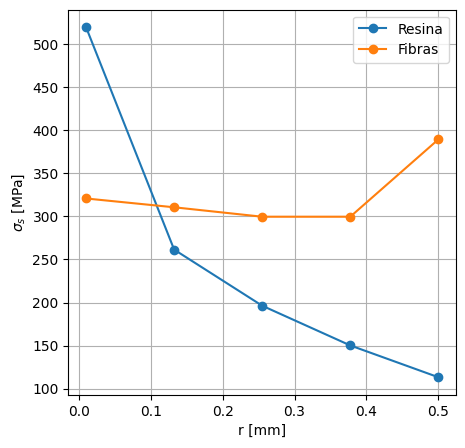

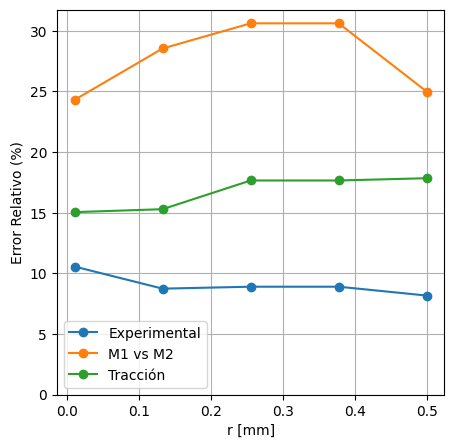

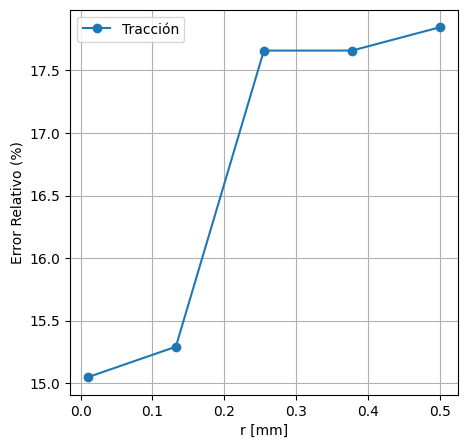

In [272]:
plt.figure(figsize=(5,5))
rr_list = iP1_json["rr_list"]
plt.plot(rr_list, S_matrix_opts, "o-", label="Resina")
plt.plot(rr_list, S_fibre_opts, "o-", label="Fibras")
plt.xlabel("r [mm]")
plt.ylabel(r"$\sigma_s$ [MPa]")
plt.legend()
plt.grid()

fig = plt.figure(figsize=(5,5))
plt.plot(rr_list, error_mu_opts, "o-", label="Experimental")

plt.plot(rr_list, error_mu_metodos, "o-", label="M1 vs M2")
plt.plot(rr_list, error_traccion, "o-", label="Tracción")

# error_mt_01 = 
plt.xlabel("r [mm]")
plt.ylabel("Error Relativo (%)")
plt.ylim([0,None])
plt.grid()
plt.legend()

fig = plt.figure(figsize=(5,5))
# plt.plot(rr_list, error_mu_opts, "o-", label="Experimental")

# plt.plot(rr_list, error_mu_metodos, "o-", label="M1 vs M2")
plt.plot(rr_list, error_traccion, "o-", label="Tracción")

# error_mt_01 = 
plt.xlabel("r [mm]")
plt.ylabel("Error Relativo (%)")
# plt.ylim([0,None])
plt.grid()
plt.legend()

Text(0, 0.5, '$\\sigma_s$ [MPa]')

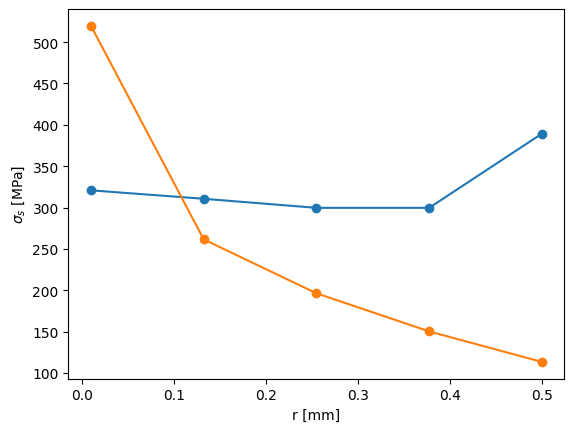

In [ ]:
# 
S_resinta 

plt.plot(rr_list, P1_opts_fibra_list, "o-", label="Fibra Opt")
plt.plot(rr_list, P1_opts_resina_list, "o-", label="Resina Opt")
plt.xlabel("r [mm]")
plt.ylabel(r"$\sigma_s$ [MPa]")

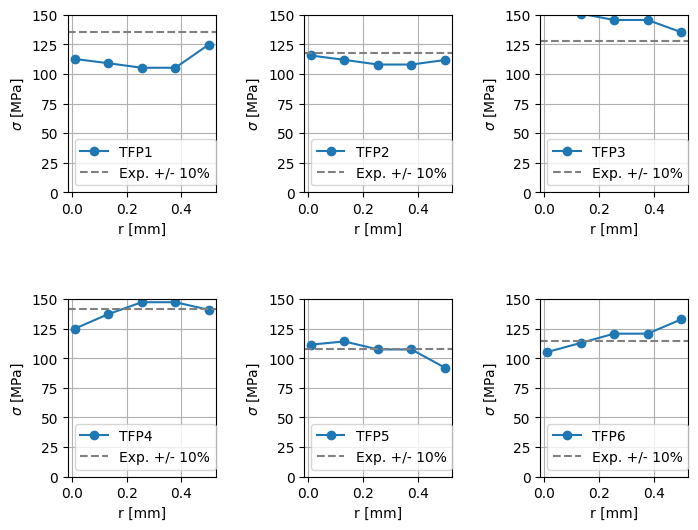

In [273]:
# Convert S_TPFi_opts into a more organized format
S_TPFi_series = {f'TFP{i+1}': [opts[i] for opts in S_TPFi_opts] 
                 for i in range(6)}

plt.figure(figsize=(8,6))
#padding
plt.subplots_adjust(hspace=0.6, wspace=0.6)

# Plot each TFP series
for jj,(tfp, values) in enumerate(S_TPFi_series.items()):
    plt.subplot(2,3,jj+1)
    plt.plot(rr_list, values, 'o-', label=tfp)
    # add horizontal line at Sb_expiremental
    df = FullExperimental()
    Sb_expiremental = df["Sb [MPa]"]["mean"].values
    plt.axhline(y=Sb_expiremental[jj], linestyle='--', color="gray", label="Exp. +/- 10%")
    # add vertical line at S_T
    plt.xlabel("r [mm]")
    plt.ylabel(r"$\sigma$ [MPa]")
    plt.grid(True)
    plt.legend()
    plt.ylim([0,150])


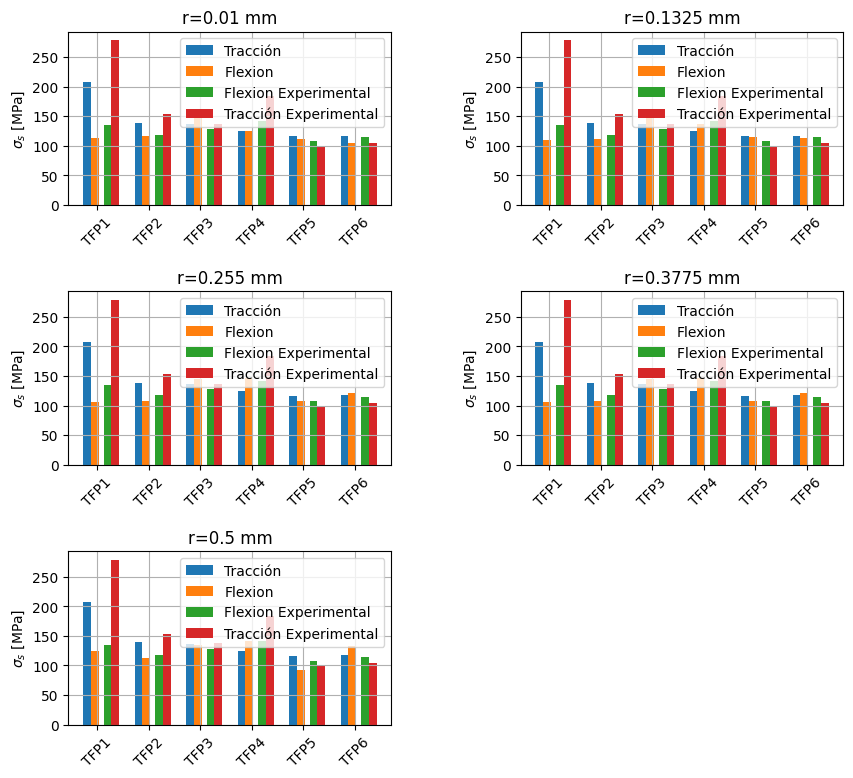

In [277]:
iS_TFP_i = S_TPFi_opts[0]

fig = plt.figure(figsize=(10,9))
# padding between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.4)
for i,iS_TFP_i in enumerate(S_TPFi_opts):
# bar plot 
    plt.subplot(3,2,i+1)
    xp = np.arange(len(iS_TFP_i))

    plt.bar(xp, St, width=0.15, label=r"Tracción")

    plt.bar(xp+0.15, iS_TFP_i, width=0.15, label=r"Flexion")
    # metodo 1 bars 
    # experimental bars
    plt.bar(xp+0.40, Sb_expiremental, width=0.15, label=r"Flexion Experimental")
    plt.bar(xp+0.55, St_expiremental, width=0.15, label=r"Tracción Experimental")
    
    plt.ylabel(r"$\sigma_s$ [MPa]")
    plt.xticks(xp+0.2, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"], rotation=45)
    plt.title("r=" + str(rr_list[i]) + " mm")
    plt.legend()
    plt.grid()

In [249]:
# experimental values 
df_Exp = FullExperimental()

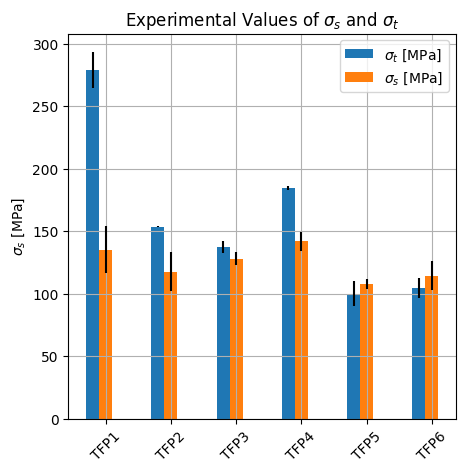

In [250]:
# df_Exp["St [MPa]"]["mean"]
plt.figure(figsize=(5,5))
plt.bar(xp, df_Exp["St [MPa]"]["mean"], width=0.2, label=r"$\sigma_t$ [MPa]",yerr=df_Exp["St [MPa]"]["std"])
plt.bar(xp+0.2, df_Exp["Sb [MPa]"]["mean"], width=0.2, label="$\sigma_s$ [MPa]", yerr=df_Exp["Sb [MPa]"]["std"])

plt.ylabel(r"$\sigma_s$ [MPa]")
plt.xticks(xp+0.2, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"], rotation=45)
plt.title("Experimental Values of $\sigma_s$ and $\sigma_t$")
plt.legend()
plt.grid()


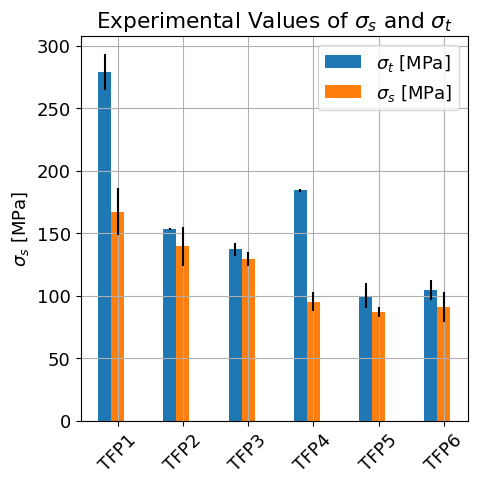

In [282]:
# df_Exp["St [MPa]"]["mean"]
plt.figure(figsize=(5,5))
#fontsize default 
plt.rcParams.update({'font.size': 13})
plt.bar(xp, df_Exp["St [MPa]"]["mean"], width=0.2, label=r"$\sigma_t$ [MPa]",yerr=df_Exp["St [MPa]"]["std"])
plt.bar(xp+0.2, Sb, width=0.2, label="$\sigma_s$ [MPa]", yerr=df_Exp["Sb [MPa]"]["std"])

plt.ylabel(r"$\sigma_s$ [MPa]")
plt.xticks(xp+0.2, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"], rotation=45)
plt.title("Experimental Values of $\sigma_s$ and $\sigma_t$")
plt.legend()
plt.grid()


([<matplotlib.axis.XTick at 0x7fa76ae73dd0>,
 [Text(0.2, 0, 'TFP1'),
  Text(1.2, 0, 'TFP2'),
  Text(2.2, 0, 'TFP3'),
  Text(3.2, 0, 'TFP4'),
  Text(4.2, 0, 'TFP5'),
  Text(5.2, 0, 'TFP6')])

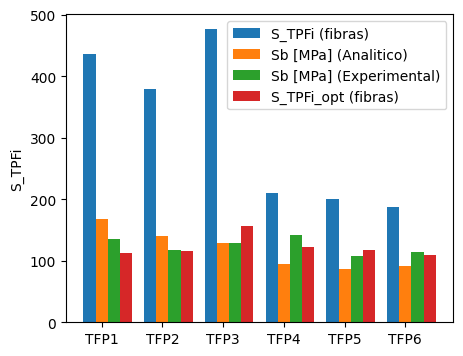

In [101]:
#bar plot 
lables = ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"]

fig = plt.figure(figsize=(5,4))
xp = np.arange(len(S_TPFi))
plt.bar(xp, S_TPFi, width=0.2, label="S_TPFi (fibras)")
plt.bar(xp+0.2, Sb, width=0.2, label="Sb [MPa] (Analitico)")
plt.bar(xp+0.4, Sb_expiremental, width=0.2, label="Sb [MPa] (Experimental)")
plt.bar(xp+0.6, S_TPFi_opt, width=0.2, label="S_TPFi_opt (fibras)")
plt.ylabel("S_TPFi")
plt.legend()
# TFP1, TFP2, TFP3, TFP4, TFP5, TFP6
plt.xticks(xp+0.2, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])

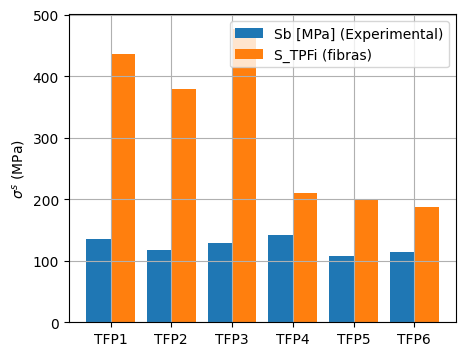

In [102]:
#bar plot 
lables = ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"]

fig = plt.figure(figsize=(5,4))
xp = np.arange(len(S_TPFi))
plt.bar(xp-0.2, Sb_expiremental, width=0.4, label="Sb [MPa] (Experimental)")
plt.bar(xp+0.2, S_TPFi, width=0.4, label="S_TPFi (fibras)")
plt.ylabel(r"$\sigma^s$ (MPa)")
plt.legend()
# TFP1, TFP2, TFP3, TFP4, TFP5, TFP6
plt.xticks(xp, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])
plt.grid()
#
# plt.ylim(0,580)
# MPa 


(0.0, 180.0)

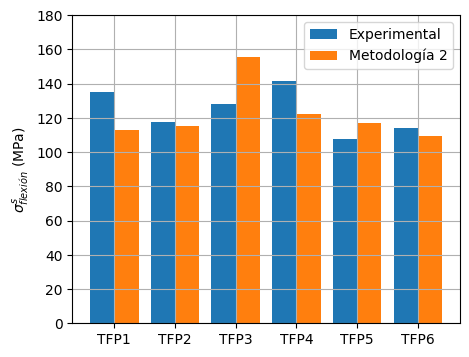

In [103]:
#bar plot 
lables = ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"]

fig = plt.figure(figsize=(5,4))
xp = np.arange(len(S_TPFi))
plt.bar(xp-0.2, Sb_expiremental, width=0.4, label="Experimental")
plt.bar(xp+0.2, S_TPFi_opt, width=0.4, label="Metodología 2")
plt.ylabel(r"$\sigma^s_{flexión}$ (MPa)")
plt.legend()
# TFP1, TFP2, TFP3, TFP4, TFP5, TFP6
plt.xticks(xp, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])
plt.grid()
#
plt.ylim(0,180)

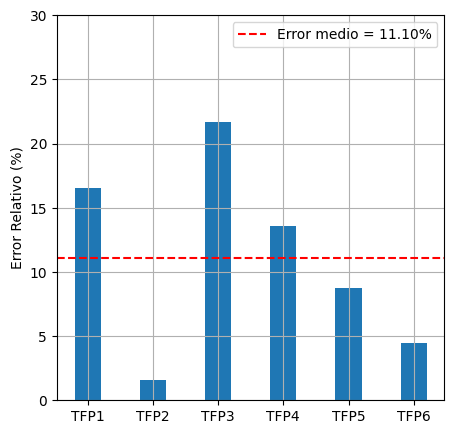

In [104]:


error_abs = np.abs(S_TPFi_opt - Sb_expiremental)
error_rel = np.abs((S_TPFi_opt - Sb_expiremental)/Sb_expiremental)*100

error_mu = np.mean(error_rel)

fig = plt.figure(figsize=(5,5))
plt.bar(xp, error_rel, width=0.4)
# line
plt.axhline(y=error_mu, color='r', linestyle='--', label="Error medio = %.2f" % error_mu + "%")
plt.ylabel("Error Relativo (%)")
plt.xticks(xp, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])
plt.legend()
plt.ylim(0, 30)
plt.grid()

In [105]:
df_results = pd.DataFrame({
    "Sn pred [MPa] (Fibras)": S_TPFi_opt,
    "Sb [MPa] (Experimental)": Sb_expiremental,

    "Error Absoluto (GPa)": error_abs,
    "Error Relativo (%)": error_rel
})

In [106]:
df_results.round(3)

,Sn pred [MPa] (Fibras),Sb [MPa] (Experimental),Error Absoluto (GPa),Error Relativo (%)
0,112.663,134.997,22.334,16.544
1,115.579,117.430,1.851,1.576
2,155.860,128.053,27.807,21.715
3,122.486,141.703,19.218,13.562
4,116.831,107.433,9.398,8.747
5,109.197,114.307,5.110,4.470


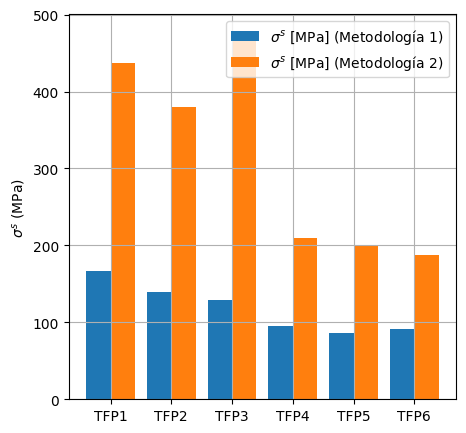

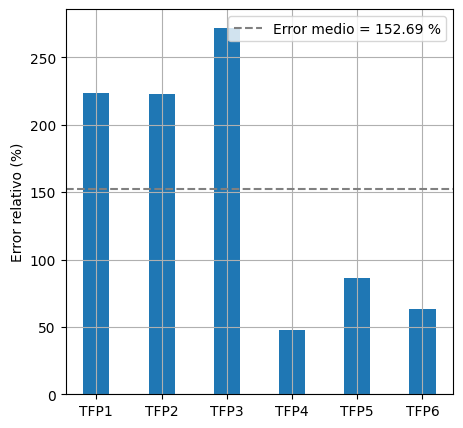

In [107]:
#bar plot 
lables = ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"]

fig = plt.figure(figsize=(5,5))
xp = np.arange(len(S_TPFi))
plt.bar(xp-0.2, Sb, width=0.4, label=r"$\sigma^s$ [MPa] (Metodología 1)")
plt.bar(xp+0.2, S_TPFi, width=0.4, label="$\sigma^s$ [MPa] (Metodología 2)")
plt.ylabel(r"$\sigma^s$ (MPa)")
plt.legend()
# TFP1, TFP2, TFP3, TFP4, TFP5, TFP6
plt.xticks(xp, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])
plt.grid()
#
# plt.ylim(0,180)

fig = plt.figure(figsize=(5,5))
error = np.abs(S_TPFi - Sb_expiremental)
error_relative = error/Sb_expiremental*100
error_mu = np.mean(error_relative)
plt.bar(xp, error_relative, width=0.4)
plt.ylabel("Error relativo (%)")
plt.xticks(xp, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])
plt.axhline(y=error_mu, linestyle='--', color="gray", label="Error medio = %.2f" % error_mu + " %")
plt.legend()
plt.grid()

Text(0, 0.5, '$\\sigma^s$ [MPa] (Metodología 2)')

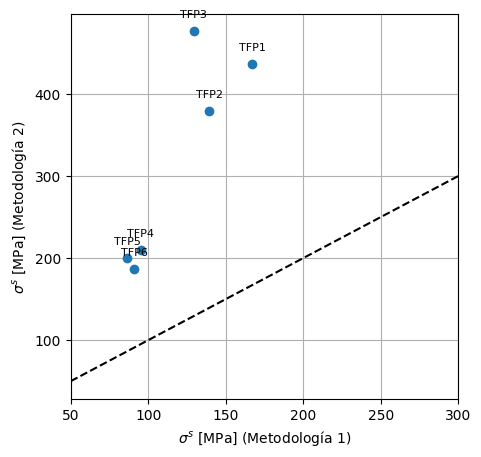

In [108]:
# vs 
fig = plt.figure(figsize=(5,5))
plt.plot(Sb,S_TPFi, "o")
plt.plot([50, 300], [50, 300], "k--")
plt.xlim(50, 300)
for i in range(len(S_TPFi)):
    plt.annotate("TFP" + str(i+1), ( Sb[i],S_TPFi[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
plt.grid()
plt.xlabel(r"$\sigma^s$ [MPa] (Metodología 1)")
plt.ylabel(r"$\sigma^s$ [MPa] (Metodología 2)")

(0.0, 30.0)

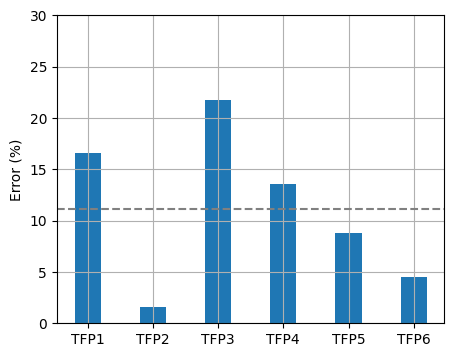

In [109]:
# error 
error = np.abs(S_TPFi_opt - Sb_expiremental)/Sb_expiremental*100
fig = plt.figure(figsize=(5,4))
plt.bar(xp, error, width=0.4, label="Error (%)");
plt.ylabel("Error (%)")
plt.xticks(xp, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"]);
error_mean = np.mean(error)
error_std = np.std(error)
plt.axhline(y=error_mean, linestyle='--', color="gray")
plt.grid()
plt.ylim(0, 30)

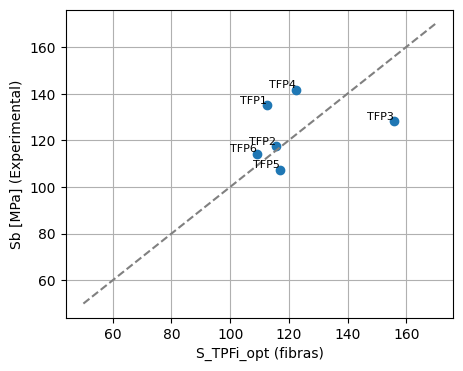

In [110]:
# fibras 
# 1 vs 1 
fig = plt.figure(figsize=(5,4))
# STPFi vs Sb_exp
plt.plot(S_TPFi_opt, Sb_expiremental, "o")
# 1:1 line
x = np.linspace(50,170, 100)
plt.plot(x, x, "--", color="gray")
plt.xlabel("S_TPFi_opt (fibras)")
plt.ylabel("Sb [MPa] (Experimental)")
plt.grid()
# text
for i, txt in enumerate(["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"]):
    plt.annotate(txt, (S_TPFi_opt[i], Sb_expiremental[i]), 
                 fontsize=8, ha='right', va='bottom')

In [111]:
F3_span

array([3536.573004  , 2532.44423157, 2340.18679752, 2381.13679995,
       3473.22558831, 3676.21103996])

In [112]:
Force_multilayer_path = r"C:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts\T02_Modelo_MultiCapa\T02_NumericalModelNOPBC\output_force.csv"
Force_multilayer_path = "../../../scripts/T02_Modelo_MultiCapa/T02_NumericalModelNOPBC/output_force.csv"
Force_multilayer = pd.read_csv(Force_multilayer_path)
Force_multilayer = Force_multilayer["Force"].values

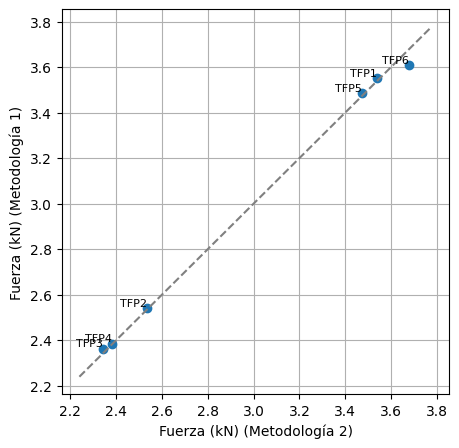

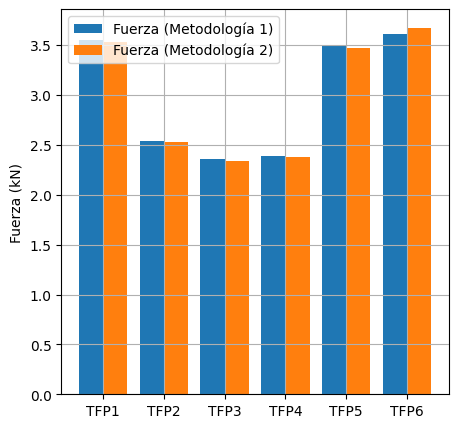

In [113]:
fig = plt.figure(figsize=(5,5))
plt.plot(1e-3*F3_span,
         1e-3*Force_multilayer, "o")
# 1vs 1 line
eps = 101e-3
x = np.linspace(min(1e-3*F3_span)-eps, 
                max(1e-3*F3_span)+eps, 100)
plt.plot(x, x, "--", color="gray")
# text TFP1, TFP2, TFP3, TFP4, TFP5, TFP6
for i, txt in enumerate(["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"]):
    plt.annotate(txt, (1e-3*F3_span[i], 
                       1e-3*Force_multilayer[i]), fontsize=8, ha='right', va='bottom')

# force 
plt.xlabel("Fuerza (kN) (Metodología 2)")
plt.ylabel("Fuerza (kN) (Metodología 1)")
plt.grid()

fig = plt.figure(figsize=(5,5))
# bar plot
plt.bar(xp, 1e-3*Force_multilayer, width=0.4, label="Fuerza (Metodología 1)")

plt.bar(xp+0.4, 1e-3*F3_span, width=0.4, label="Fuerza (Metodología 2)")
plt.ylabel("Fuerza (kN)")
plt.xticks(xp+0.2, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])
plt.legend()
plt.grid()

In [114]:
summaries_multicapa_path = r"C:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts\T02_Modelo_MultiCapa\T02_NumericalModelNOPBC\summaries.json"
summaries_multicapa_path = "../../../scripts/T02_Modelo_MultiCapa/T02_NumericalModelNOPBC/summaries.json"
from loadsavejson.loadjson import loadjson

summaries_multicapa = loadjson(summaries_multicapa_path)
summaries_multicapa = summaries_multicapa["summaries"]

In [115]:
summaries_multicapa[0]

{'layers': ['Y', 'Y', 'nucleo', 'Y', 'Y'],
 'P1': [[0.0, 413.2557686907389, 826.511819911243],
  [0.0, 270.22531936034557, 540.450451351391],
  [0.0, 4.868031741125714, 9.736062196946502],
  [0.0, 56.637201305262465, 113.27447240935112],
  [0.0, -12.843371817091452, -25.68698981172429]],
 'F3': [-0.0, 1775.63158, 3551.2637799999998],
 'sigma_exp': [-0.0, 273.5533698089779, 547.1068351350052]}

In [116]:
layers = summaries_multicapa[0]["layers"]

In [117]:
st_df_path = "../../../scripts_finals/01_metodo/02_flexion/04_optim_stress/Sl.csv"
# st_df_path = r"C:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts_finals\01_metodo\02_flexion\04_optim_stress\Sl.csv"
df_st = pd.read_csv(st_df_path)
df_st

,Unnamed: 0,0
0,S_fibra,651.843390
1,S_matrix,620.945570
2,S_X,473.050229
3,S_SX,195.889233
4,S_Y,266.080492
5,S_SY,93.029122


In [118]:
St_layers = {
    "X"   : df_st.T[2].values[1],
    "SX"  : df_st.T[3].values[1],
    "Y"   : df_st.T[4].values[1],
    "SY"  : df_st.T[5].values[1],
    "nucleo" : 0.0,
}

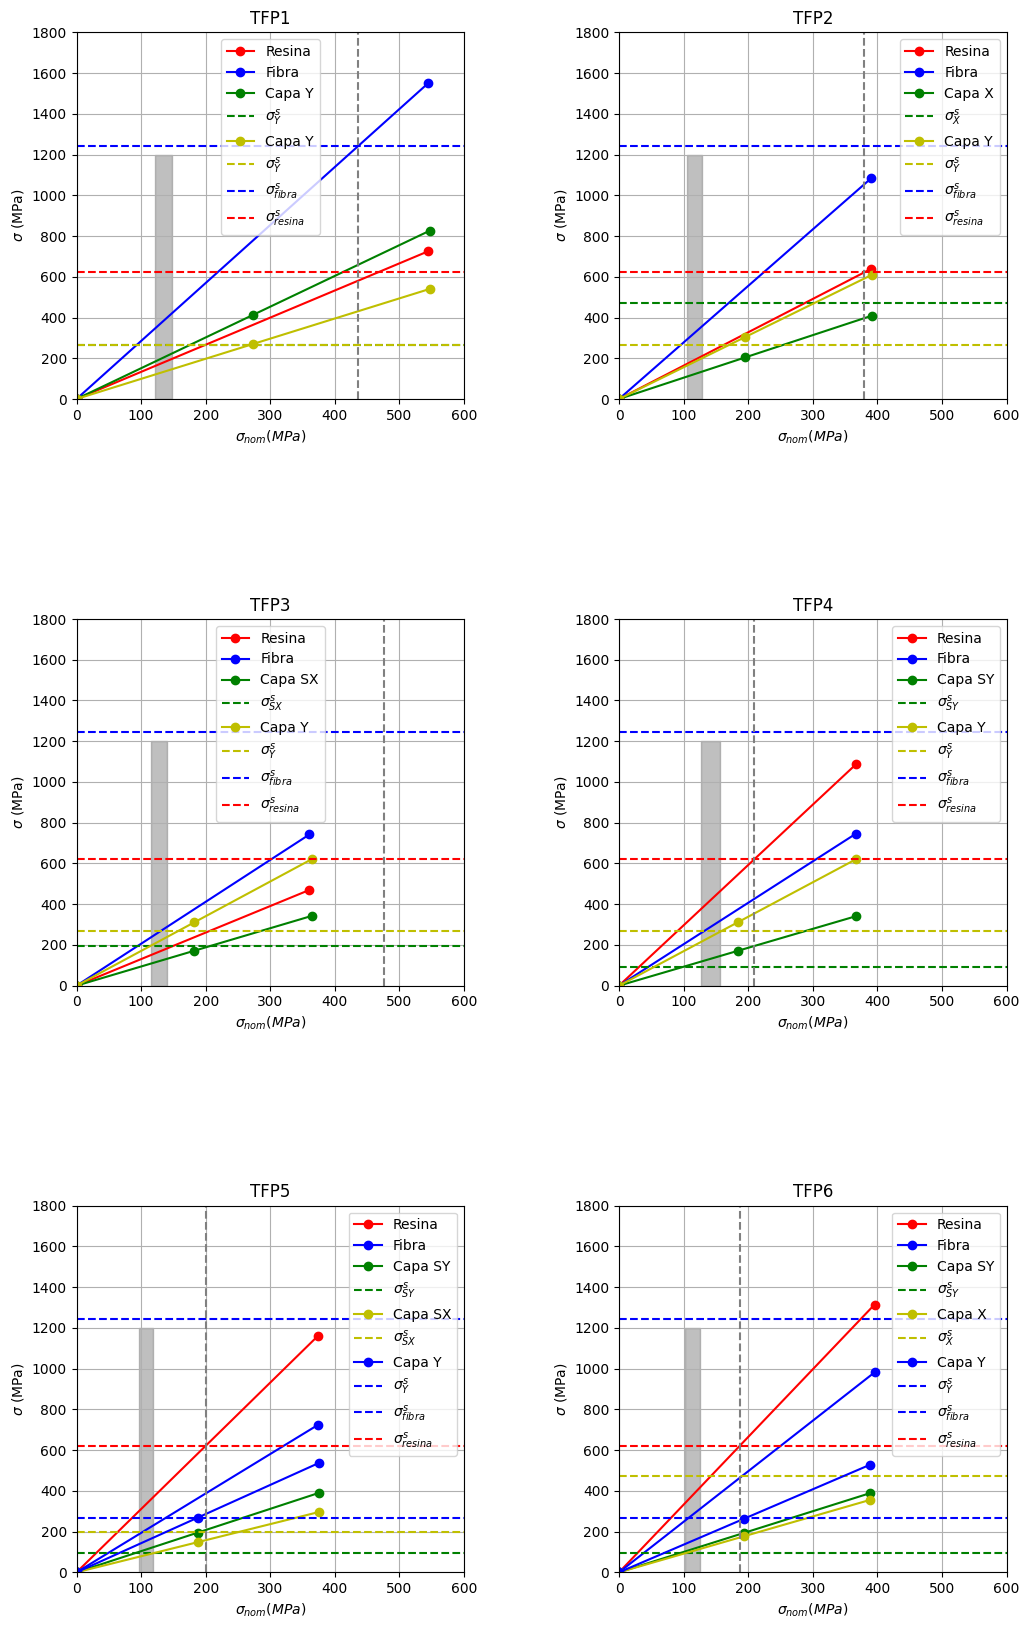

In [119]:
fig = plt.figure(figsize=(12,20))
#padding between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.4)

ncapas = [2,2,2,2,3,3]
colors = ["g","y","b","r","c","m"]
for i in range(6):

    isum = summaries_multicapa[i]
    layers = isum["layers"]
    P1 = isum["P1"]
    plt.subplot(3,2,i+1)
    plt.plot([0,sigma_exp[i]], [0,P1_resina[i]], "o-", label="Resina",color="r")
    plt.plot([0,sigma_exp[i]], [0,P1_max[i]], "o-", label="Fibra",color="b")

    sigma_exp_mc = isum["sigma_exp"]
    for j in range(ncapas[i]):
        plt.plot(sigma_exp_mc, P1[j], "o-", label="Capa "+layers[j],color=colors[j])
        # horizontal line
        plt.axhline(y=St_layers[layers[j]], linestyle='--', label=r"$\sigma_{"+layers[j]+"}^s$",
                    color=colors[j])


    # horizontal line
    plt.axhline(y=Sfibre, linestyle='--', label="$\sigma_{fibra}^s$",
                color="b")
    plt.axhline(y=Smatrix, linestyle='--', label="$\sigma_{resina}^s$",
                color="r")

    # experimental vertical line
    # 10% rectangle vertical line
    plt.fill_betweenx([0, 1200], 
                      Sb_expiremental[i]-Sb_expiremental[i]*0.1, 
                      Sb_expiremental[i]+Sb_expiremental[i]*0.1, 
                      color="gray", alpha=0.5)
    
    # vertical line
    plt.axvline(x=S_TPFi_old[i], linestyle='--', color="gray")
    plt.ylabel(r"$\sigma$ (MPa)")
    plt.xlabel(r"$\sigma_{nom} (MPa)$")
    plt.grid()
    plt.title("TFP" + str(i+1))
    plt.ylim(0, 1800)
    plt.xlim(0, 600)
    plt.legend()

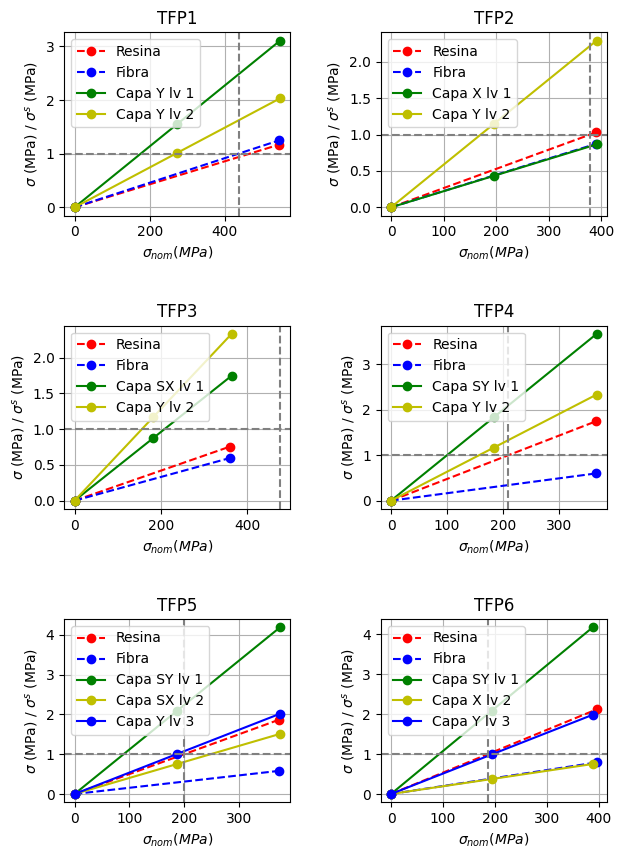

In [120]:
fig = plt.figure(figsize=(7,10))
#padding between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.4)

ncapas = [2,2,2,2,3,3]
colors = ["g","y","b","r","c","m"]
for i in range(6):

    isum = summaries_multicapa[i]
    layers = isum["layers"]
    P1 = isum["P1"]
    plt.subplot(3,2,i+1)
    plt.plot([0,sigma_exp[i]], [0,P1_resina[i]/Smatrix], "o--", label="Resina",color="r")
    plt.plot([0,sigma_exp[i]], [0,P1_max[i]/Sfibre], "o--", label="Fibra",color="b")

    sigma_exp_mc = isum["sigma_exp"]
    for j in range(ncapas[i]):

        # damage = P1[j]/St_layers[layers[j]]
        damage = np.array([P1[j][k]/St_layers[layers[j]] for k in range(len(P1[j]))])
        plt.plot(sigma_exp_mc,damage,
                 "o-", label="Capa "+layers[j] + " lv " + str(j+1)
                 ,color=colors[j])


    
    # vertical line
    plt.axvline(x=S_TPFi_old[i], linestyle='--', color="gray")
    plt.ylabel(r"$\sigma$ (MPa) / $\sigma^s$ (MPa)")
    plt.xlabel(r"$\sigma_{nom} (MPa)$")
    plt.grid()
    plt.title("TFP" + str(i+1))

    ## draw 1 lines horizontal
    plt.axhline(y=1, linestyle='--', color="gray")

    plt.legend()

In [121]:
frds_files

['TPF1/output/main.frd',
 'TPF2/output/main.frd',
 'TPF3/output/main.frd',
 'TPF4/output/main.frd',
 'TPF5/output/main.frd',
 'TPF6/output/main.frd']

In [122]:
from djccx.inp.inp import inp 

inp_f = inp(frds_files[0].replace(".frd",".inp"))

Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified


Wine está instalado. Versión: wine-9.0
Wine is installed. Calculix will be run with windows binary


In [123]:
resina = inp_f.select("RESINA","elset")

nodes = resina.GetUniqueNodes(inp_f)
indx_resina = nodes.index

ifrd_1 = ifrds[0]["data"].copy()
ifrd_1 = ifrd_1[ifrd_1["z"]<0]
ifrd_1 = ifrd_1[ifrd_1["x"]<5]
x_resina = ifrd_1["x"]
P1_resina = ifrd_1["P1"]

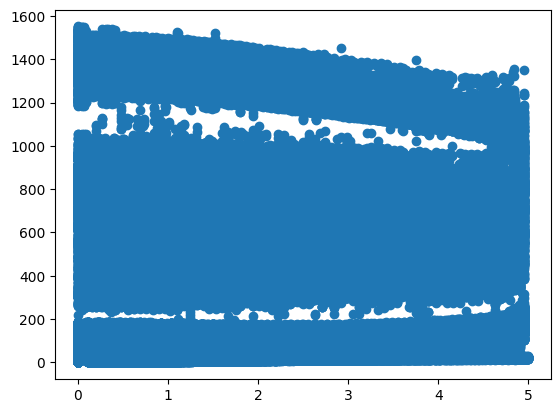

In [124]:
plt.plot(x_resina, P1_resina, "o")